In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense,SimpleRNN,LSTM, GRU
from keras.callbacks import EarlyStopping

# **Load Data**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/weather_prediction_dataset.csv')


In [ ]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


# **Feature Selection**

In [ ]:
features = ['BASEL_humidity' , 'BASEL_pressure' ,'BASEL_sunshine','TOURS_temp_mean','TOURS_temp_min', 'TOURS_temp_max']
df_1 = df[features]

In [ ]:
df_1

,BASEL_humidity,BASEL_pressure,BASEL_sunshine,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,0.89,1.0286,0.0,8.5,7.2,9.8
1,0.87,1.0318,0.0,7.9,6.6,9.2
2,0.81,1.0314,3.7,8.1,6.6,9.6
3,0.79,1.0262,6.9,8.6,6.4,10.8
4,0.90,1.0246,3.7,8.0,6.4,9.5
...,...,...,...,...,...,...
3649,0.82,1.0084,0.3,6.2,1.8,10.6
3650,0.92,1.0028,0.2,10.4,6.2,14.5
3651,0.92,0.9979,0.0,10.0,8.7,11.3
3652,0.93,0.9958,0.1,8.5,6.2,10.9


In [ ]:
features = [ 'BASEL_humidity' , 'BASEL_pressure' ,'BASEL_sunshine','TOURS_temp_mean','TOURS_temp_min']
target = 'TOURS_temp_max'

In [ ]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
X= df_1.values[:, :-1]
y= df_1.values[:, -1]

In [ ]:
X

array([[ 0.89  ,  1.0286,  0.    ,  8.5   ,  7.2   ],
       [ 0.87  ,  1.0318,  0.    ,  7.9   ,  6.6   ],
       [ 0.81  ,  1.0314,  3.7   ,  8.1   ,  6.6   ],
       ...,
       [ 0.92  ,  0.9979,  0.    , 10.    ,  8.7   ],
       [ 0.93  ,  0.9958,  0.1   ,  8.5   ,  6.2   ],
       [ 0.93  ,  0.9965,  0.    ,  0.5   , -0.7   ]])

In [ ]:
X.shape

(3654, 5)

In [ ]:
y

array([ 9.8,  9.2,  9.6, ..., 11.3, 10.9,  1.8])

In [ ]:
y.shape

(3654,)

# **Split Data**

In [ ]:
#The data is in ascending order
#from 2000 to 2007 = 2923 from 3654 so it will be = .8
#and 2008 + 2009 = 731 from 3654 so it will be = .2
#'shuffle = false' (it is mean that we take from the data( fist 2923==> train & after them will be validtion = 731))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, shuffle=False, train_size = .8)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)

(2923, 5)
(2923,)
(731, 5)
(731,)


(None, None)

In [ ]:
step = 5
#add step elements into train and validation
train = np.append(X_train,np.repeat(X_train[-1],step))
validation = np.append(X_valid,np.repeat(X_valid[-1],step))

In [ ]:
X_train = np.reshape( X_train , (X_train.shape[0],1 ,X_train.shape[1]))
X_valid = np.reshape( X_valid , (X_valid.shape[0],1 ,X_valid.shape[1]))
y_train = np.reshape( y_train , (y_train.shape[0],1))
y_valid = np.reshape( y_valid , (y_valid.shape[0],1 ))
X_train.shape

(2923, 1, 5)

# **Early Stopping**

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# **RNN Model**

In [ ]:
#Bulding a model with simpleRNN
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step),activation="tanh"))
model.add(Dense(1))
model.compile(loss='mse', optimizer= 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1216      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model with train data and predict validation data
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=150,batch_size=32,callbacks=[earlyStopping])
trainPredict = model.predict(X_train)
validPredict=model.predict(X_valid)


Epoch 1/150
92/92 [==============================] - 7s 7ms/step - loss: 248.9670 - val_loss: 174.7501
Epoch 2/150
92/92 [==============================] - 0s 5ms/step - loss: 130.9024 - val_loss: 95.0794
Epoch 3/150
92/92 [==============================] - 0s 4ms/step - loss: 86.6367 - val_loss: 67.3562
Epoch 4/150
92/92 [==============================] - 0s 4ms/step - loss: 64.1706 - val_loss: 50.2056
Epoch 5/150
92/92 [==============================] - 0s 4ms/step - loss: 49.5825 - val_loss: 38.6925
Epoch 6/150
92/92 [==============================] - 0s 4ms/step - loss: 38.9124 - val_loss: 29.9144
Epoch 7/150
92/92 [==============================] - 0s 4ms/step - loss: 30.5866 - val_loss: 23.1282
Epoch 8/150
92/92 [==============================] - 0s 4ms/step - loss: 24.2085 - val_loss: 18.0447
Epoch 9/150
92/92 [==============================] - 0s 4ms/step - loss: 19.3253 - val_loss: 14.2073
Epoch 10/150
92/92 [==============================] - 0s 4ms/step - loss: 15.5491 - val_

# **Try three different step sizes**

In [ ]:
step_size = 3
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_valid_step = np.cumsum(X_valid, axis=1) - step_size + 1

RNN_step = model.fit(X_train_step, y_train, validation_data=(X_valid_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'RNN validation loss: {RNN_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 4ms/step - loss: 1.1680 - val_loss: 0.5883
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 0.5548 - val_loss: 0.5375
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 0.5150 - val_loss: 0.3767
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 0.4227 - val_loss: 0.3780
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3711 - val_loss: 0.2493
Epoch 6/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3470 - val_loss: 0.2645
Epoch 7/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3103 - val_loss: 0.2022
Epoch 8/100
92/92 [==============================] - 1s 7ms/step - loss: 0.2932 - val_loss: 0.1877
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.2650 - val_loss: 0.1873
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 0.2476 - val_loss: 0.1690
Epoch 11/

In [ ]:
step_size = 5
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_valid_step = np.cumsum(X_valid, axis=1) - step_size + 1

RNN_step = model.fit(X_train_step, y_train, validation_data=(X_valid_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'RNN validation loss: {RNN_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 1s 7ms/step - loss: 9.6275 - val_loss: 1.9969
Epoch 2/100
92/92 [==============================] - 1s 8ms/step - loss: 1.3848 - val_loss: 0.8859
Epoch 3/100
92/92 [==============================] - 1s 7ms/step - loss: 0.4391 - val_loss: 0.2146
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 0.1311 - val_loss: 0.0719
Epoch 5/100
92/92 [==============================] - 1s 8ms/step - loss: 0.0679 - val_loss: 0.0403
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0487 - val_loss: 0.0271
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0414 - val_loss: 0.0261
Epoch 8/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.0217
Epoch 9/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0321 - val_loss: 0.0192
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.0159
Epoch 11/

In [ ]:
step_size = 20
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_valid_step = np.cumsum(X_valid, axis=1) - step_size + 1

RNN_step = model.fit(X_train_step, y_train, validation_data=(X_valid_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'RNN validation loss: {RNN_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 1s 6ms/step - loss: 48.2679 - val_loss: 18.2533
Epoch 2/100
92/92 [==============================] - 1s 10ms/step - loss: 14.3471 - val_loss: 11.2868
Epoch 4/100
92/92 [==============================] - 1s 10ms/step - loss: 9.3766 - val_loss: 5.9442
Epoch 5/100
92/92 [==============================] - 1s 8ms/step - loss: 7.0577 - val_loss: 5.1583
Epoch 6/100
92/92 [==============================] - 1s 5ms/step - loss: 6.1937 - val_loss: 4.6361
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 5.5858 - val_loss: 4.2546
Epoch 8/100
92/92 [==============================] - 0s 4ms/step - loss: 5.0813 - val_loss: 3.8196
Epoch 9/100
92/92 [==============================] - 0s 4ms/step - loss: 4.6614 - val_loss: 3.5205
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 3.5556 - val_loss: 1.5436
Epoch 11/100
92/92 [==============================] - 0s 4ms/step - loss: 2.2190 - val_loss: 1.3154
Ep

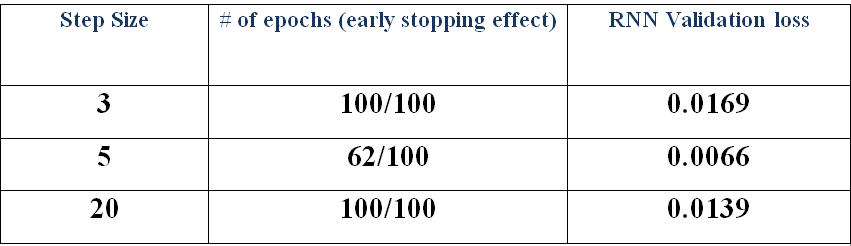

# **GRU Model**

In [ ]:
#Bulding a model with GRU
model_1 = Sequential()
model_1.add(GRU(units=32, input_shape=(1,step),activation="tanh"))
model_1.add(Dense(8,activation= "relu"))
model_1.add(Dense(1))
model_1.compile(loss='mse', optimizer= 'adam')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3744      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,017
Trainable params: 4,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model with train data and predict validation data
model_1.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=100,batch_size=32,callbacks=[earlyStopping])
trainPredict = model_1.predict(X_train)
validPredict=model_1.predict(X_valid)
predicted=np.concatenate((trainPredict,validPredict),axis=0)

Epoch 1/100
92/92 [==============================] - 4s 8ms/step - loss: 229.2979 - val_loss: 119.6713
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 56.5262 - val_loss: 21.0612
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 16.6809 - val_loss: 8.1211
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 6.6807 - val_loss: 3.0017
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 2.9478 - val_loss: 1.5071
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 1.7386 - val_loss: 0.9730
Epoch 7/100
92/92 [==============================] - 1s 7ms/step - loss: 1.1716 - val_loss: 0.6261
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.8468 - val_loss: 0.4556
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.6404 - val_loss: 0.3503
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 0.4966 - val_loss: 0.2480
Ep

# **Try three different step sizes**

In [ ]:
step_sizes = 3
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_val_step = np.cumsum(X_valid, axis=1) - step_size + 1

GRU_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'GRU validation loss: {GRU_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 91.5429 - val_loss: 1.7877
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 1.1872 - val_loss: 0.5104
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.4273 - val_loss: 0.2495
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 0.1751 - val_loss: 0.1341
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 0.1233 - val_loss: 0.0973
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 0.1062 - val_loss: 0.0851
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0934 - val_loss: 0.0804
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0870 - val_loss: 0.0768
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0787 - val_loss: 0.0678
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0718 - val_loss: 0.0696
Epoch 11

In [ ]:
step_sizes = 5
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_val_step = np.cumsum(X_valid, axis=1) - step_size + 1

GRU_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'GRU validation loss: {GRU_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0221 - val_loss: 0.0177
Epoch 2/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0225 - val_loss: 0.0184
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0233 - val_loss: 0.0151
Epoch 4/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0227 - val_loss: 0.0232
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0244 - val_loss: 0.0160
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.0144
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.0154
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0165
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.0170
Epoch 11/

In [ ]:
step_sizes = 20
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_val_step = np.cumsum(X_valid, axis=1) - step_size + 1

GRU_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'GRU validation loss: {GRU_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0121
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.0150
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.0085
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0083
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0088
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0142
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0235
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0188
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.0120
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.0104
Epoch 11/

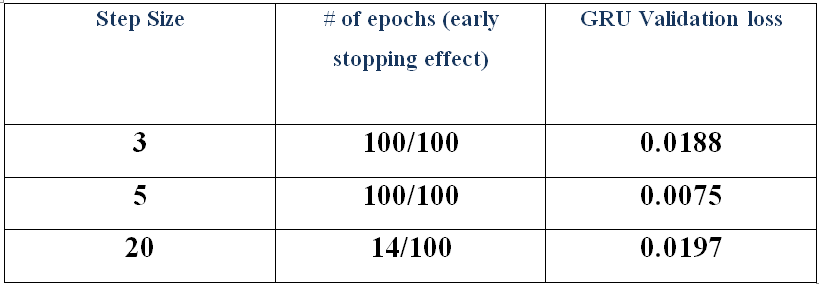

# **LSTM Model**

In [ ]:
#Bulding a model with LSTM
model_2 = Sequential()
model_2.add(LSTM(units=32, input_shape=(1,step),activation="tanh"))
model_2.add(Dense(8,activation= "relu"))
model_2.add(Dense(1))
model_2.compile(loss='mse', optimizer= 'adam')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,137
Trainable params: 5,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model with train data and predict validation data
model_2.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=100,batch_size=32,callbacks=[earlyStopping])
trainPredict = model_2.predict(X_train)
validPredict=model_2.predict(X_valid)
predicted=np.concatenate((trainPredict,validPredict),axis=0)

Epoch 1/100
92/92 [==============================] - 3s 10ms/step - loss: 290.9623 - val_loss: 180.7552
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 86.0596 - val_loss: 24.5619
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 20.1727 - val_loss: 10.5136
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 8.5447 - val_loss: 3.9529
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 3.8206 - val_loss: 2.0506
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 2.2530 - val_loss: 1.2666
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 1.5547 - val_loss: 1.1374
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 1.1549 - val_loss: 0.6375
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.8756 - val_loss: 0.5749
Epoch 10/100
92/92 [==============================] - 1s 8ms/step - loss: 0.6873 - val_loss: 0.3755


# **Try three different step sizes**

In [ ]:
step_sizes = 3
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_val_step = np.cumsum(X_valid, axis=1) - step_size +1

LSTM_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'LSTM validation loss: {LSTM_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0126
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 4/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0114 - val_loss: 0.0086
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0126 - val_loss: 0.0081
Epoch 6/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0126 - val_loss: 0.0075
Epoch 7/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0110 - val_loss: 0.0094
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0170
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0071
Epoch 10/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0081
Epoch 11/

In [ ]:
step_sizes = 5
X_train_step = np.cumsum(X_train, axis=1) - step_size +1 
X_val_step = np.cumsum(X_valid, axis=1) - step_size + 1

LSTM_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'LSTM validation loss: {LSTM_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.0267
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.0078
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0094
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0095
Epoch 7/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0116 - val_loss: 0.0126
Epoch 8/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0106
Epoch 9/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0114 - val_loss: 0.0126
Epoch 10/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0119 - val_loss: 0.0077
Epoch 11/

In [ ]:
step_sizes = 20
X_train_step = np.cumsum(X_train, axis=1) - step_size + 1
X_val_step = np.cumsum(X_valid, axis=1) - step_size +1

LSTM_step = model_1.fit(X_train_step, y_train, validation_data=(X_val_step, y_valid ), epochs=100, batch_size=32, callbacks=[earlyStopping])
print(f'LSTM validation loss: {LSTM_step.history["val_loss"][-1]}')


Epoch 1/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0071
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.0065
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0154
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0303
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0095
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.0121
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0118
Epoch 9/100
92/92 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0065
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.0078
Epoch 11/

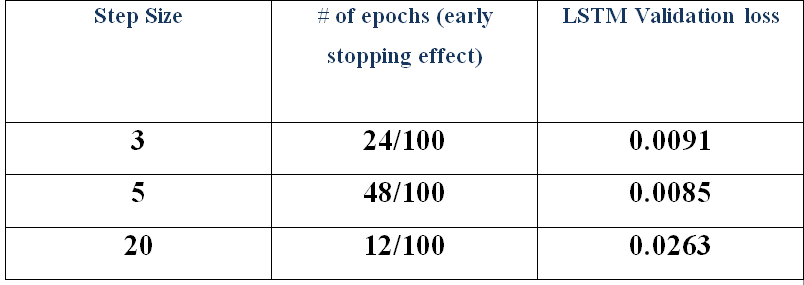

# Conclusion 

In the end we conclude that with different timesteps (3,5,20)
We found that the model **LSTM** is better in terms of val_loss whe we use timeste= **3**
, model **RNN** is better in terms of val_loss whe we use timeste= **5**
and found that model **RNN** is better in terms of val_loss whe we use timeste= **20**

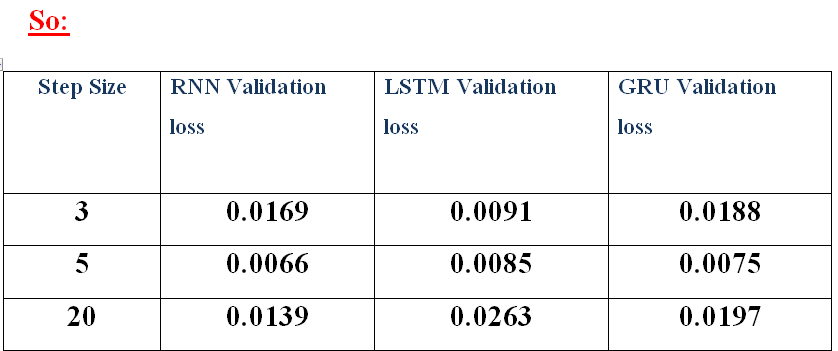